# Census Income Data Set 

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

# Load the Data

In [ ]:
col_names=['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'inc_class']


In [ ]:
ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)
ds.head()

/var/folders/6r/1m4vqq2918dbj4br6r6qsn2c0000gn/T/ipykernel_99820/41874643.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,inc_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
ds.shape

(32561, 15)

# Categorical features

In [ ]:
import category_encoders as ce

In [ ]:
ds.dtypes[ds.dtypes=='object'].index


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'inc_class'],
      dtype='object')

In [ ]:
ce_bin = ce.BinaryEncoder(cols = list(ds.dtypes[ds.dtypes=='object'].index))
ce_bin.fit_transform(ds)

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,inc_class_0,inc_class_1
0,39,0,0,0,1,77516,0,0,0,0,...,0,40,0,0,0,0,0,1,0,1
1,50,0,0,1,0,83311,0,0,0,0,...,0,13,0,0,0,0,0,1,0,1
2,38,0,0,1,1,215646,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
3,53,0,0,1,1,234721,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
4,28,0,0,1,1,338409,0,0,0,0,...,0,40,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,1,1,257302,0,0,1,1,...,0,38,0,0,0,0,0,1,0,1
32557,40,0,0,1,1,154374,0,0,0,1,...,0,40,0,0,0,0,0,1,1,0
32558,58,0,0,1,1,151910,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
32559,22,0,0,1,1,201490,0,0,0,1,...,0,20,0,0,0,0,0,1,0,1


# Algorithms

In [ ]:
from sklearn.model_selection import train_test_split

#set x and y
#classification
ds_clf=ds.drop(['inc_class'], axis=1)
#binary encoding
ce_bin = ce.BinaryEncoder(cols = list(ds_clf.dtypes[ds_clf.dtypes=='object'].index))
ds_clf_bin_enc=ce_bin.fit_transform(ds_clf)
y_clf=[0 if ic==' <=50K' else 1 for ic in ds.inc_class]
#Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(ds_clf_bin_enc, y_clf, test_size=0.33, random_state=42)


#regression
ds_reg = ds.drop(['age'], axis=1)
ce_bin = ce.BinaryEncoder(cols = list(ds_reg.dtypes[ds_reg.dtypes=='object'].index))
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(ce_bin.fit_transform(ds_reg), ds.age, test_size=0.33, random_state=42)


In [ ]:
X_train_c.shape

(21815, 36)

## Dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### PCA

In [ ]:
pca = PCA(n_components=2)
x_pca_clf=pca.fit_transform(ds_clf_bin_enc)
X_train_c2D, X_test_c2D, y_train_c2D, y_test_c2D = train_test_split(x_pca_clf, y_clf, test_size=0.33, random_state=42)


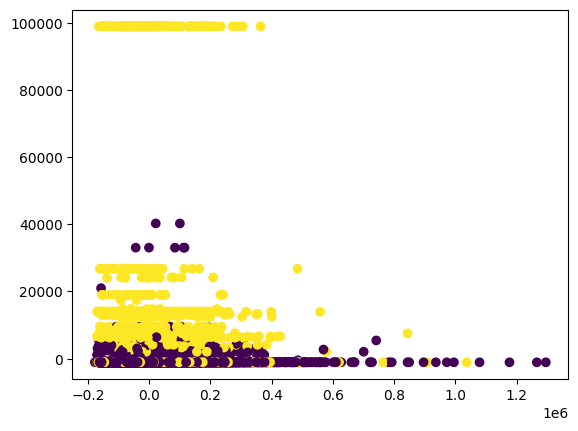

In [ ]:
plt.scatter(x_pca_clf[:,0], x_pca_clf[:,1], c=y_clf)

### TSNE

In [15]:
tsne=TSNE(n_components=2)
x_tsne_clf=tsne.fit_transform(ds_clf_bin_enc)
X_train_c2D2, X_test_c2D2, y_train_c2D2, y_test_c2D2 = train_test_split(x_tsne_clf, y_clf, test_size=0.33, random_state=42)

/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


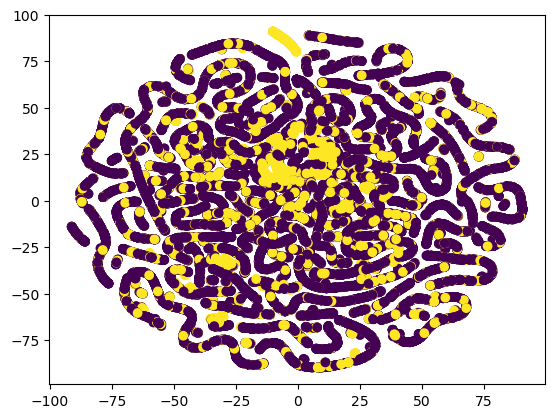

In [14]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], c=y_clf)

## Neural network

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow.keras.utils 
from tensorflow.keras.callbacks import ModelCheckpoint

In [29]:
X_train_c.shape

(21815, 36)

In [38]:
# create model
model = Sequential()
model.add(Dense(36, input_dim=X_train_c.shape[1], activation='tanh'))
model.add(Dense(24))
model.add(Dense(12))
model.add(Dense(1, activation='sigmoid'))

# load weights
import os
if os. path. isfile('model.best.hdf5'):
    model.load_weights("model.best.hdf5")
    print("Created model and loaded weights from file")
    
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

Created model and loaded weights from file


In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 36)                1332      
                                                                 
 dense_13 (Dense)            (None, 24)                888       
                                                                 
 dense_14 (Dense)            (None, 12)                300       
                                                                 
 dense_15 (Dense)            (None, 1)                 13        
                                                                 
Total params: 2,533
Trainable params: 2,533
Non-trainable params: 0
_________________________________________________________________


In [40]:
# checkpoint
filepath="model.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [41]:
X_train_c=np.array(X_train_c.values)
y_train_c=np.array(y_train_c)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [42]:
history = model.fit(
    X_train_c, 
    y_train_c, 
    epochs=100, 
    batch_size=32, 
    verbose=1, 
    validation_split=0.2, 
    callbacks=callbacks_list, 
    use_multiprocessing=True
)


Epoch 1/100
535/546 [============================>.] - ETA: 0s - loss: 0.5252 - accuracy: 0.7737
Epoch 1: val_accuracy improved from -inf to 0.78776, saving model to model.best.hdf5
546/546 [==============================] - 3s 5ms/step - loss: 0.5247 - accuracy: 0.7741 - val_loss: 0.4988 - val_accuracy: 0.7878
Epoch 2/100
546/546 [==============================] - ETA: 0s - loss: 0.5063 - accuracy: 0.7825
Epoch 2: val_accuracy improved from 0.78776 to 0.78982, saving model to model.best.hdf5
546/546 [==============================] - 2s 4ms/step - loss: 0.5063 - accuracy: 0.7825 - val_loss: 0.5013 - val_accuracy: 0.7898
Epoch 3/100
546/546 [==============================] - ETA: 0s - loss: 0.5035 - accuracy: 0.7899
Epoch 3: val_accuracy improved from 0.78982 to 0.79120, saving model to model.best.hdf5
546/546 [==============================] - 2s 4ms/step - loss: 0.5035 - accuracy: 0.7899 - val_loss: 0.4974 - val_accuracy: 0.7912
Epoch 4/100
543/546 [============================>.] - 

Epoch 30/100
534/546 [============================>.] - ETA: 0s - loss: 0.5021 - accuracy: 0.7896
Epoch 30: val_accuracy improved from 0.79876 to 0.79899, saving model to model.best.hdf5
546/546 [==============================] - 2s 4ms/step - loss: 0.5029 - accuracy: 0.7889 - val_loss: 0.4920 - val_accuracy: 0.7990
Epoch 31/100
546/546 [==============================] - ETA: 0s - loss: 0.5040 - accuracy: 0.7891
Epoch 31: val_accuracy improved from 0.79899 to 0.79968, saving model to model.best.hdf5
546/546 [==============================] - 2s 4ms/step - loss: 0.5040 - accuracy: 0.7891 - val_loss: 0.4913 - val_accuracy: 0.7997
Epoch 32/100
531/546 [============================>.] - ETA: 0s - loss: 0.5032 - accuracy: 0.7877
Epoch 32: val_accuracy did not improve from 0.79968
546/546 [==============================] - 2s 4ms/step - loss: 0.5039 - accuracy: 0.7873 - val_loss: 0.4924 - val_accuracy: 0.7935
Epoch 33/100
542/546 [============================>.] - ETA: 0s - loss: 0.5032 - ac

Epoch 59/100
534/546 [============================>.] - ETA: 0s - loss: 0.5035 - accuracy: 0.7888
Epoch 59: val_accuracy did not improve from 0.79991
546/546 [==============================] - 2s 4ms/step - loss: 0.5035 - accuracy: 0.7889 - val_loss: 0.4977 - val_accuracy: 0.7933
Epoch 60/100
540/546 [============================>.] - ETA: 0s - loss: 0.5024 - accuracy: 0.7912
Epoch 60: val_accuracy did not improve from 0.79991
546/546 [==============================] - 2s 4ms/step - loss: 0.5033 - accuracy: 0.7905 - val_loss: 0.4942 - val_accuracy: 0.7930
Epoch 61/100
535/546 [============================>.] - ETA: 0s - loss: 0.5022 - accuracy: 0.7904
Epoch 61: val_accuracy did not improve from 0.79991
546/546 [==============================] - 2s 4ms/step - loss: 0.5019 - accuracy: 0.7908 - val_loss: 0.4900 - val_accuracy: 0.7985
Epoch 62/100
544/546 [============================>.] - ETA: 0s - loss: 0.5026 - accuracy: 0.7886
Epoch 62: val_accuracy did not improve from 0.79991
546/546

538/546 [============================>.] - ETA: 0s - loss: 0.5119 - accuracy: 0.7893
Epoch 88: val_accuracy did not improve from 0.79991
546/546 [==============================] - 2s 4ms/step - loss: 0.5123 - accuracy: 0.7890 - val_loss: 0.5047 - val_accuracy: 0.7949
Epoch 89/100
533/546 [============================>.] - ETA: 0s - loss: 0.5121 - accuracy: 0.7902
Epoch 89: val_accuracy did not improve from 0.79991
546/546 [==============================] - 2s 4ms/step - loss: 0.5118 - accuracy: 0.7905 - val_loss: 0.5051 - val_accuracy: 0.7939
Epoch 90/100
544/546 [============================>.] - ETA: 0s - loss: 0.5116 - accuracy: 0.7905
Epoch 90: val_accuracy did not improve from 0.79991
546/546 [==============================] - 2s 4ms/step - loss: 0.5113 - accuracy: 0.7907 - val_loss: 0.5050 - val_accuracy: 0.7939
Epoch 91/100
538/546 [============================>.] - ETA: 0s - loss: 0.5116 - accuracy: 0.7900
Epoch 91: val_accuracy did not improve from 0.79991
546/546 [===========

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

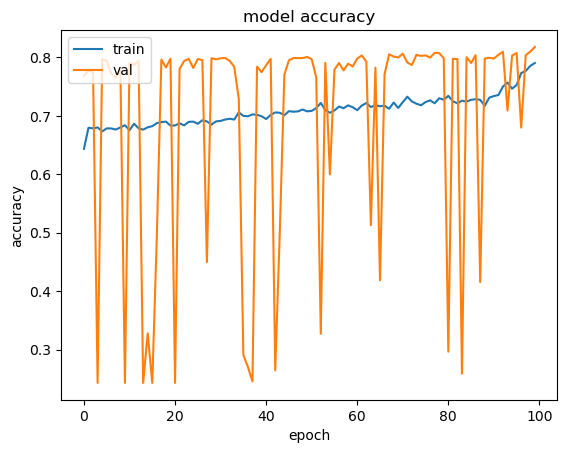

In [37]:
#model accuracy
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

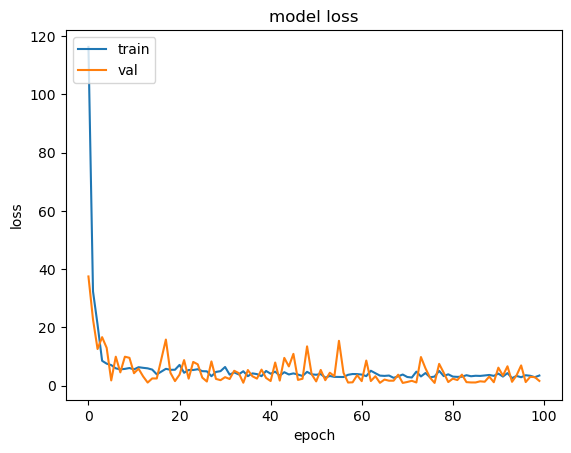

In [24]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
X_test_c = np.array(X_test_c)
y_test_c = np.array(y_test_c)

In [28]:

model.evaluate(X_test_c, y_test_c)

336/336 [==============================] - 1s 2ms/step - loss: 1.5438 - accuracy: 0.8251


[1.5437983274459839, 0.8251442313194275]

In [50]:
X_test_c

array([[27,  0,  0, ...,  0,  0,  1],
       [45,  0,  0, ...,  0,  0,  1],
       [29,  0,  0, ...,  0,  0,  1],
       ...,
       [65,  0,  0, ...,  0,  0,  1],
       [42,  0,  0, ...,  0,  0,  1],
       [28,  0,  0, ...,  0,  1,  0]], dtype=int64)

In [51]:
type(X_test_c)

numpy.ndarray

In [39]:
y_test_c.count(1)

2550

In [40]:
y_test_c.count(0)

8196

In [49]:
X_test_c=np.array(X_test_c.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

## Kohonen SOM

In [43]:
import numpy as np
from som import SOM
data = np.array(X_train_c)
som = SOM(data.shape[1], 1)  # initialize the SOM
som.fit(data, 1000, save_e=True, interval=100)  # fit the SOM for 10000 epochs, save the error every 100 steps
som.plot_error_history(filename='som_error.png')  # plot the training error history

targets = np.array(y_train_c)  # create some dummy target values



Epoch 0;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 1;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 2;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 3;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 4;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 5;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 6;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 7;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 8;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 9;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 10;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 11;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 12;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 13;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 14;    Neuron [0, 0];    	Sigma: 18.0000;    alpha: 0.6000
Epoch 15;    Neuron [0, 0];    	Sig

Epoch 201;    Neuron [0, 0];    	Sigma: 17.5401;    alpha: 0.5847
Epoch 202;    Neuron [0, 0];    	Sigma: 17.5311;    alpha: 0.5844
Epoch 203;    Neuron [0, 0];    	Sigma: 17.5220;    alpha: 0.5841
Epoch 204;    Neuron [0, 0];    	Sigma: 17.5128;    alpha: 0.5838
Epoch 205;    Neuron [0, 0];    	Sigma: 17.5034;    alpha: 0.5834
Epoch 206;    Neuron [0, 0];    	Sigma: 17.4939;    alpha: 0.5831
Epoch 207;    Neuron [0, 0];    	Sigma: 17.4843;    alpha: 0.5828
Epoch 208;    Neuron [0, 0];    	Sigma: 17.4746;    alpha: 0.5825
Epoch 209;    Neuron [0, 0];    	Sigma: 17.4647;    alpha: 0.5822
Epoch 210;    Neuron [0, 0];    	Sigma: 17.4547;    alpha: 0.5818
Epoch 211;    Neuron [0, 0];    	Sigma: 17.4445;    alpha: 0.5815
Epoch 212;    Neuron [0, 0];    	Sigma: 17.4343;    alpha: 0.5811
Epoch 213;    Neuron [0, 0];    	Sigma: 17.4239;    alpha: 0.5808
Epoch 214;    Neuron [0, 0];    	Sigma: 17.4133;    alpha: 0.5804
Epoch 215;    Neuron [0, 0];    	Sigma: 17.4027;    alpha: 0.5801
Epoch 216;

Epoch 401;    Neuron [0, 0];    	Sigma: 12.7175;    alpha: 0.4239
Epoch 402;    Neuron [0, 0];    	Sigma: 12.6803;    alpha: 0.4227
Epoch 403;    Neuron [0, 0];    	Sigma: 12.6429;    alpha: 0.4214
Epoch 404;    Neuron [0, 0];    	Sigma: 12.6056;    alpha: 0.4202
Epoch 405;    Neuron [0, 0];    	Sigma: 12.5681;    alpha: 0.4189
Epoch 406;    Neuron [0, 0];    	Sigma: 12.5306;    alpha: 0.4177
Epoch 407;    Neuron [0, 0];    	Sigma: 12.4931;    alpha: 0.4164
Epoch 408;    Neuron [0, 0];    	Sigma: 12.4555;    alpha: 0.4152
Epoch 409;    Neuron [0, 0];    	Sigma: 12.4179;    alpha: 0.4139
Epoch 410;    Neuron [0, 0];    	Sigma: 12.3802;    alpha: 0.4127
Epoch 411;    Neuron [0, 0];    	Sigma: 12.3425;    alpha: 0.4114
Epoch 412;    Neuron [0, 0];    	Sigma: 12.3047;    alpha: 0.4102
Epoch 413;    Neuron [0, 0];    	Sigma: 12.2669;    alpha: 0.4089
Epoch 414;    Neuron [0, 0];    	Sigma: 12.2290;    alpha: 0.4076
Epoch 415;    Neuron [0, 0];    	Sigma: 12.1911;    alpha: 0.4064
Epoch 416;

Epoch 601;    Neuron [0, 0];    	Sigma: 5.8143;    alpha: 0.1938
Epoch 602;    Neuron [0, 0];    	Sigma: 5.7881;    alpha: 0.1929
Epoch 603;    Neuron [0, 0];    	Sigma: 5.7621;    alpha: 0.1921
Epoch 604;    Neuron [0, 0];    	Sigma: 5.7362;    alpha: 0.1912
Epoch 605;    Neuron [0, 0];    	Sigma: 5.7103;    alpha: 0.1903
Epoch 606;    Neuron [0, 0];    	Sigma: 5.6846;    alpha: 0.1895
Epoch 607;    Neuron [0, 0];    	Sigma: 5.6590;    alpha: 0.1886
Epoch 608;    Neuron [0, 0];    	Sigma: 5.6335;    alpha: 0.1878
Epoch 609;    Neuron [0, 0];    	Sigma: 5.6081;    alpha: 0.1869
Epoch 610;    Neuron [0, 0];    	Sigma: 5.5827;    alpha: 0.1861
Epoch 611;    Neuron [0, 0];    	Sigma: 5.5575;    alpha: 0.1853
Epoch 612;    Neuron [0, 0];    	Sigma: 5.5324;    alpha: 0.1844
Epoch 613;    Neuron [0, 0];    	Sigma: 5.5075;    alpha: 0.1836
Epoch 614;    Neuron [0, 0];    	Sigma: 5.4826;    alpha: 0.1828
Epoch 615;    Neuron [0, 0];    	Sigma: 5.4578;    alpha: 0.1819
Epoch 616;    Neuron [0, 

Epoch 801;    Neuron [0, 0];    	Sigma: 2.3644;    alpha: 0.0788
Epoch 802;    Neuron [0, 0];    	Sigma: 2.3542;    alpha: 0.0785
Epoch 803;    Neuron [0, 0];    	Sigma: 2.3440;    alpha: 0.0781
Epoch 804;    Neuron [0, 0];    	Sigma: 2.3339;    alpha: 0.0778
Epoch 805;    Neuron [0, 0];    	Sigma: 2.3238;    alpha: 0.0775
Epoch 806;    Neuron [0, 0];    	Sigma: 2.3138;    alpha: 0.0771
Epoch 807;    Neuron [0, 0];    	Sigma: 2.3038;    alpha: 0.0768
Epoch 808;    Neuron [0, 0];    	Sigma: 2.2939;    alpha: 0.0765
Epoch 809;    Neuron [0, 0];    	Sigma: 2.2840;    alpha: 0.0761
Epoch 810;    Neuron [0, 0];    	Sigma: 2.2741;    alpha: 0.0758
Epoch 811;    Neuron [0, 0];    	Sigma: 2.2643;    alpha: 0.0755
Epoch 812;    Neuron [0, 0];    	Sigma: 2.2546;    alpha: 0.0752
Epoch 813;    Neuron [0, 0];    	Sigma: 2.2449;    alpha: 0.0748
Epoch 814;    Neuron [0, 0];    	Sigma: 2.2353;    alpha: 0.0745
Epoch 815;    Neuron [0, 0];    	Sigma: 2.2257;    alpha: 0.0742
Epoch 816;    Neuron [0, 

Error history plot done!
Point map plot done!
Class density plot done!
Distance map plot done!


In [44]:
# now visualize the learned representation with the class labels
som.plot_point_map(data, targets, ['Class 0', 'Class 1'], filename='som.png')
som.plot_class_density(data, targets, t=0, name='Class 0', filename='class_0.png')
som.plot_distance_map(filename='distance_map.png')  # plot the distance map after training

Point map plot done!
Class density plot done!
Distance map plot done!


In [ ]:
import numpy as np
from som import SOM

# generate some random data with 36 features
data1 = np.random.normal(loc=-.25, scale=0.5, size=(500, 36))
data2 = np.random.normal(loc=.25, scale=0.5, size=(500, 36))
data = np.vstack((data1, data2))

som = SOM(10, 10)  # initialize the SOM
som.fit(data, 1000, save_e=True, interval=100)  # fit the SOM for 10000 epochs, save the error every 100 steps
som.plot_error_history()  # plot the training error history

targets = np.array(500 * [0] + 500 * [1])  # create some dummy target values

# now visualize the learned representation with the class labels
som.plot_point_map(data, targets, ['Class 0', 'Class 1'])
som.plot_class_density(data, targets, t=0, name='Class 0')
som.plot_distance_map()  # plot the distance map after training